In [1]:
import pandas as pd
path = ('E:\Desktop\data143_fina_data.xlsx')

In [2]:
df_demo = pd.read_excel(path, sheet_name='Table 2',usecols=range(0, 8))

In [3]:
df_demo.head(10)

,username,age,sex,bmi,psqi,race,zygosity,country
0,predict10091,53.645448,F,25.530409,5.0,White,MZ,GB
1,predict10092,53.645448,F,24.272560,8.0,White,MZ,GB
2,predict10181,43.110198,F,21.620041,3.0,White,MZ,GB
3,predict10182,42.967830,F,22.728657,2.0,White,MZ,GB
4,predict10332,62.140999,F,22.374670,4.0,White,MZ,GB
5,predict10691,59.567420,F,28.870464,4.0,White,MZ,GB
6,predict10692,59.567420,F,27.297931,4.0,White,MZ,GB
7,predict10821,51.578371,F,29.452598,10.0,White,MZ,GB
8,predict11101,46.633812,F,29.878078,3.0,White,MZ,GB
9,predict11102,46.633812,F,30.031151,7.0,White,MZ,GB


In [4]:
df_demo.tail(10)

,username,age,sex,bmi,psqi,race,zygosity,country
89525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_demo = df_demo.dropna(how='all')
print(df_demo.tail(10))

          username        age sex        bmi  psqi            race zygosity  \
823  predict998921  49.412731   M  23.959078   NaN           Asian       NT   
824  predict998931  58.412047   F  22.562388   NaN           White       NT   
825  predict998941  34.083504   F  25.464608   NaN           White       NT   
826  predict998951  58.329911   F  26.062282   NaN           White       NT   
827  predict998961  58.414784   M  27.522406   NaN           White       NT   
828  predict998971  59.427789   F  25.607152   NaN  Other or Mixed       NT   
829  predict998981  64.342231   M  30.371478   NaN           White       NT   
830  predict998991  30.844627   F  22.920658   NaN           White       NT   
831  predict999001  42.184805   F  21.942190   NaN         African       NT   
832    predict9991  55.822040   F  26.113602   5.0           White       MZ   

    country  
823      US  
824      US  
825      US  
826      US  
827      US  
828      US  
829      US  
830      US  
831 

In [24]:
df_static = pd.read_excel(path, sheet_name='Table 2',usecols=range(0, 8)) #To keep Original Values Intact
df_static = df_static.dropna(how='all')

In [7]:
df = df_demo

In [23]:
df['age'] = df['age'].round(0)
df['bmi'] = df['bmi'].round(2)
df.head(10)


,username,age,sex,bmi,psqi,race,zygosity,country
823,predict998921,49.0,M,23.96,NaN,Asian,NT,US
824,predict998931,58.0,F,22.56,NaN,White,NT,US
825,predict998941,34.0,F,25.46,NaN,White,NT,US
826,predict998951,58.0,F,26.06,NaN,White,NT,US
827,predict998961,58.0,M,27.52,NaN,White,NT,US
828,predict998971,59.0,F,25.61,NaN,Other or Mixed,NT,US
829,predict998981,64.0,M,30.37,NaN,White,NT,US
830,predict998991,31.0,F,22.92,NaN,White,NT,US
831,predict999001,42.0,F,21.94,NaN,African,NT,US
832,predict9991,56.0,F,26.11,5.0,White,MZ,GB


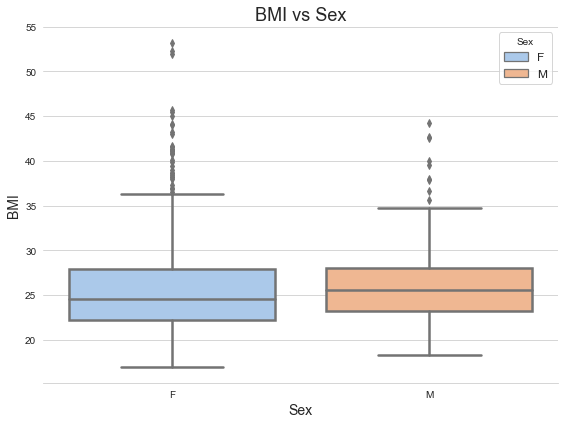

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set_style("whitegrid")
sns.set_palette("pastel")

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="sex", y="bmi", data=df, ax=ax, hue='sex', dodge=False, linewidth=2.5)
sns.despine(left=True)

ax.set_title("BMI vs Sex", fontsize=18)
ax.set_xlabel("Sex", fontsize=14)
ax.set_ylabel("BMI", fontsize=14)
ax.legend(loc='best', title="Sex", fontsize=12)

plt.tight_layout()
plt.show()

In [28]:
# create a scatter plot of age vs BMI
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import row, column

output_notebook()

source = ColumnDataSource(data=dict(age=df['age'], bmi=df['bmi']))
p1 = figure(title='Age vs BMI', x_axis_label='Age', y_axis_label='BMI',plot_width=500, plot_height=300)
p1.circle('age', 'bmi', source=source)

# create a bar plot of gender distribution
gender_counts = df['sex'].value_counts()
gender_list = gender_counts.index.tolist()
count_list = gender_counts.tolist()
source = ColumnDataSource(data=dict(gender=gender_list, count=count_list))
p2 = figure(title='Gender Distribution', x_range=gender_list, x_axis_label='Gender', y_axis_label='Count',plot_width=300, plot_height=200)
p2.vbar(x='gender', top='count', width=0.5, source=source)

# display the plots
show(column(row(p1), row(p2)))

Loading BokehJS ...

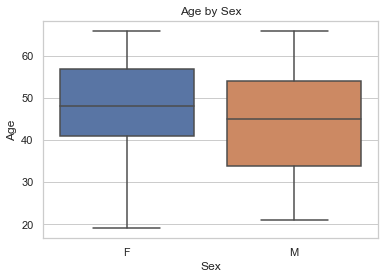

In [51]:
# Boxplot of age by sex
sns.boxplot(x='sex', y='age', data=df)
plt.title('Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


In [16]:
# find the maximum and minimum values of age
max_age = df['age'].max()
min_age = df['age'].min()

# print the results
print("Maximum BMI:", max_age)
print("Minimum BMI:", min_age)

Maximum BMI: 65.9164955509924
Minimum BMI: 18.6967830253251


In [12]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral4
import pandas as pd

In [15]:
# Define BMI ranges and categories
bmi_ranges = [(0, 18.5), (18.5, 25), (25, 30), (30, df['bmi'].max() + 1)]
bmi_categories = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']

# Define colors for each category
colors = ['#90EE90', '#008000', '#FF6666', '#CC0000']

# Create a dictionary to count the number of people in each BMI category
bmi_counts = {'Underweight': 0, 'Healthy Weight': 0, 'Overweight': 0, 'Obese': 0}

for i in range(len(bmi_ranges)):
    lower_bound = bmi_ranges[i][0]
    upper_bound = bmi_ranges[i][1]
    category = bmi_categories[i]
    count = ((df['bmi'] >= lower_bound) & (df['bmi'] < upper_bound)).sum()
    bmi_counts[category] = count

# Create a ColumnDataSource
source = ColumnDataSource(data={
    'bmi_categories': bmi_categories,
    'bmi_counts': [bmi_counts[cat] for cat in bmi_categories],
    'colors': colors
})

# Create the plot
p = figure(x_range=bmi_categories, plot_height=400, plot_width=600,
           title='BMI Distribution', tools='pan,wheel_zoom,reset')
p.vbar(x='bmi_categories', top='bmi_counts', width=0.9, source=source,
       fill_color='colors', line_color='white')

# Set axis labels
p.xaxis.axis_label = 'BMI Categories'
p.yaxis.axis_label = 'Number of People'

# Show the plot
show(p)


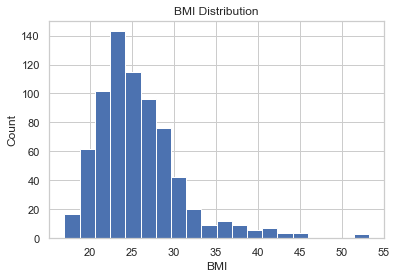

In [50]:
# Histogram of BMI
plt.hist(x='bmi', data=df, bins=20)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


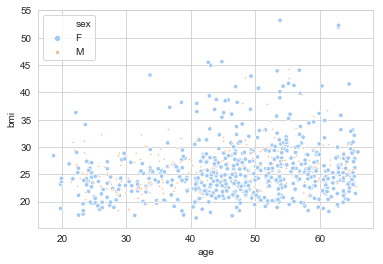

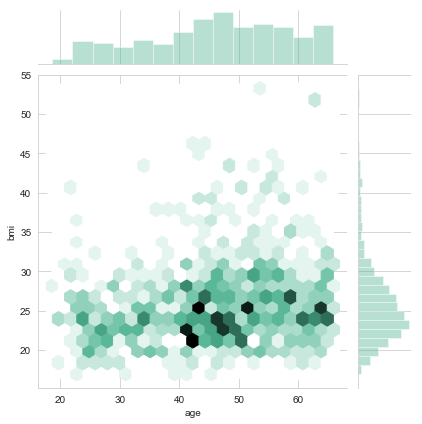

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# create scatter plot with different colors and sizes based on gender
sns.scatterplot(data=df, x="age", y="bmi", hue="sex", size="sex", sizes=(5, 20))

# create heatmap based on age and bmi
sns.jointplot(data=df, x="age", y="bmi", kind="hex", color="#4CB391")

# display the plots
plt.show()


In [29]:
# find the maximum and minimum values of age
max_age = df['age'].max()
min_age = df['age'].min()

# print the results
print("Maximum BMI:", max_age)
print("Minimum BMI:", min_age)

Maximum BMI: 66.0
Minimum BMI: 19.0


In [32]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Range1d, FactorRange
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

# get the counts of people in each age range
age_ranges = ['20-30', '30-40', '40-50', '50-60', '60-70']
age_counts = []
for i in range(len(age_ranges)):
    if i == len(age_ranges) - 1:
        count = len(df[(df['age'] >= int(age_ranges[i].split('-')[0])) & (df['age'] <= int(age_ranges[i].split('-')[1]))])
    else:
        count = len(df[(df['age'] >= int(age_ranges[i].split('-')[0])) & (df['age'] < int(age_ranges[i].split('-')[1]))])
    age_counts.append(count)

# create a ColumnDataSource with the data
colors = ['#FF5733', '#FFC300', '#DAF7A6', '#9ACD32', '#228B22']

# create a ColumnDataSource with the data
source = ColumnDataSource(data=dict(age_ranges=age_ranges, age_counts=age_counts))

# create the figure
p = figure(x_range=FactorRange(factors=age_ranges), y_range=Range1d(0, max(age_counts) + 50), plot_height=400, plot_width=800, title="Age Ranges")

# add the bars to the plot with the color mapping
p.vbar(x='age_ranges', top='age_counts', width=0.9, source=source, line_color='white',
       fill_color=factor_cmap('age_ranges', palette=colors, factors=age_ranges))

# set the x-axis and y-axis labels
p.xaxis.axis_label = "Age Ranges"
p.yaxis.axis_label = "Number of People"

# show the plot
output_notebook()
show(p)






Loading BokehJS ...

In [33]:
df.head(10)

,username,age,sex,bmi,psqi,race,zygosity,country
0,predict10091,54.0,F,25.53,5.0,White,MZ,GB
1,predict10092,54.0,F,24.27,8.0,White,MZ,GB
2,predict10181,43.0,F,21.62,3.0,White,MZ,GB
3,predict10182,43.0,F,22.73,2.0,White,MZ,GB
4,predict10332,62.0,F,22.37,4.0,White,MZ,GB
5,predict10691,60.0,F,28.87,4.0,White,MZ,GB
6,predict10692,60.0,F,27.30,4.0,White,MZ,GB
7,predict10821,52.0,F,29.45,10.0,White,MZ,GB
8,predict11101,47.0,F,29.88,3.0,White,MZ,GB
9,predict11102,47.0,F,30.03,7.0,White,MZ,GB


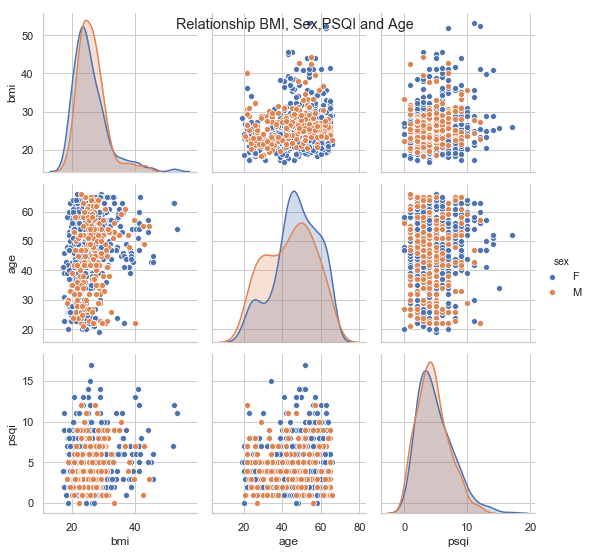

In [53]:
import seaborn as sns

# Create a scatterplot matrix
sns.pairplot(data=df, vars=['bmi', 'age','psqi'], hue='sex')

# Set the title of the plot
plt.suptitle('Relationship BMI, Sex,PSQI and Age')

# Show the plot
plt.show()


In [34]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral10

# Group the DataFrame by country and count the number of people in each group
country_counts = df.groupby('country').size().reset_index(name='counts')

# Create a ColumnDataSource with the data
source = ColumnDataSource(country_counts)

# Define the x-axis categories (i.e. the countries)
countries = source.data['country'].tolist()

# Create the figure
p = figure(x_range=FactorRange(factors=countries), plot_height=400, plot_width=800, title='Number of People by Country')

# Add the bars to the plot, with each country having a different color
colors = factor_cmap('country', palette=Spectral10, factors=countries)
p.vbar(x='country', top='counts', source=source, width=0.9, line_color='white', fill_color=colors)

# Set the x-axis and y-axis labels
p.xaxis.axis_label = 'Country'
p.yaxis.axis_label = 'Number of People'

# Show the plot
output_notebook()
show(p)


Loading BokehJS ...

In [35]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral10

# Group the DataFrame by country and count the number of people in each group
country_counts = df.groupby('race').size().reset_index(name='counts')

# Create a ColumnDataSource with the data
source = ColumnDataSource(country_counts)

# Define the x-axis categories (i.e. the countries)
countries = source.data['race'].tolist()

# Create the figure
p = figure(x_range=FactorRange(factors=countries), plot_height=400, plot_width=800, title='Number of People by Race')

# Add the bars to the plot, with each country having a different color
colors = factor_cmap('race', palette=Spectral10, factors=countries)
p.vbar(x='race', top='counts', source=source, width=0.9, line_color='white', fill_color=colors)

# Set the x-axis and y-axis labels
p.xaxis.axis_label = 'Race'
p.yaxis.axis_label = 'Number of People'

# Show the plot
output_notebook()
show(p)


Loading BokehJS ...

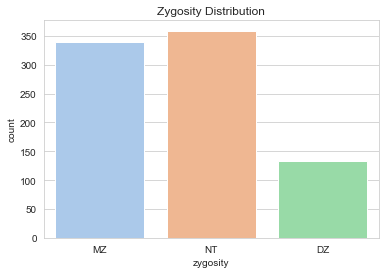

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe (assuming it's already done)
# and store it in a variable called 'df'

# Set the style of the plot
sns.set_style("whitegrid")

# Create a countplot using seaborn
sns.countplot(x='zygosity', data=df)

# Add a title to the plot
plt.title("Zygosity Distribution")

# Show the plot
plt.show()


In [44]:
df_psqi = pd.read_excel(path, sheet_name='Table 2',usecols=range(0, 8))

In [47]:
df_psqi = df_psqi.dropna(how='all')
df_psqi = df_psqi.dropna(subset=['psqi'])
df_psqi['psqi'] = df_psqi['psqi'].astype(int)

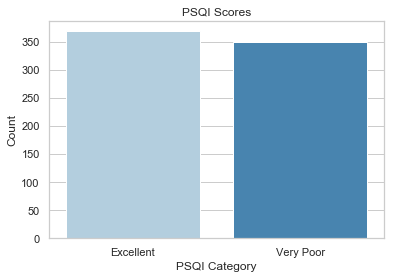

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the bin ranges and labels
bin_ranges = [0, 4, 21]
bin_labels = ['Excellent', 'Very Poor']

# Cut the PSQI scores into bins and assign labels
df_psqi['psqi_bin'] = pd.cut(df_psqi['psqi'], bins=bin_ranges, labels=bin_labels)

# Calculate the count of each bin
bin_counts = df_psqi['psqi_bin'].value_counts()

# Create a bar plot using seaborn
sns.set(style='whitegrid')
ax = sns.barplot(x=bin_counts.index, y=bin_counts, palette='Blues')

# Set the x-axis labels using the bin_labels
ax.set_xticklabels(bin_labels)

# Set the plot title and axis labels
ax.set(title='PSQI Scores', xlabel='PSQI Category', ylabel='Count')

# Show the plot
plt.show()
